#1 - Faça o módulo do Kaggle Intro to Machine Learning:
Comprove a finalização do módulo com um print que contenha data e identificação do aluno.

https://www.kaggle.com/ftneves

https://www.kaggle.com/learn/intro-to-machine-learning



In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV,RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, precision_recall_curve, roc_curve, roc_auc_score,accuracy_score, f1_score

warnings.filterwarnings('ignore')

#2 - Trabalho com base:

Iremos usar a base de dados de vinhos verdes portugueses (nas variantes branco e tinto) que encontra-se disponível no Kaggle:

Faça o download da base - esta é uma base real, apresentada no artigo: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

In [107]:
# Passo de conexão com Google Drive para carregar os dados que iremos trabalhar
from google.colab import drive
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Conexão do Goggle Drive com o Colab
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
# Passo de leitura dos dados (raw) e armazenamento no objeto Pandas Dataframe
PATH = '/content/drive/MyDrive/dataset/winequalityN.csv'
data = pd.read_csv(PATH)
#print(type(data))
data.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [109]:
data.shape

(6497, 13)

Ela possui uma variável denominada "quality", uma nota de 0 a 10 que denota a qualidade do vinho. Crie uma nova variável, chamada "opinion" que será uma variável categórica igual à 0, quando quality for menor e igual à 5. O valor será 1, caso contrário. Desconsidere a variável quality para o restante da análise.


In [110]:
#Incluindo uma nova coluna com variavel Opnion se quality > 5 then 1 else 0
#Desconsidere a variável quality para o restante da análise. Drop da coluna quality
data['opinion'] = data['quality'].apply(lambda x: 1 if x > 5 else 0)
data.drop('quality', axis=1, inplace=True)
data.head()


type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  opinion  
0       0.45      8.8        1  
1       0.49      9.5        1  
2       0.44     10.1        1  
3       0.40      9.9        1  
4       0.40      9.9        1

In [111]:
# Modificando os nomes das colunas para facilizar o trabalho futuro
data.columns = data.columns.str.lower().str.replace(' ', '_').str.replace(')', '')
data.head(0)

Empty DataFrame
Columns: [type, fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, ph, sulphates, alcohol, opinion]
Index: []

In [112]:
#Analisar se temos dados nulos no nosso conjunto de dados
data.isna().sum()

type                     0
fixed_acidity           10
volatile_acidity         8
citric_acid              3
residual_sugar           2
chlorides                2
free_sulfur_dioxide      0
total_sulfur_dioxide     0
density                  0
ph                       9
sulphates                4
alcohol                  0
opinion                  0
dtype: int64

In [113]:
# Limpar todos os dados nulos
data.dropna(inplace=True)

In [114]:
#Analisar se temos dados nulos no nosso conjunto de dados
data.isna().sum()

type                    0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
opinion                 0
dtype: int64

<Axes: >

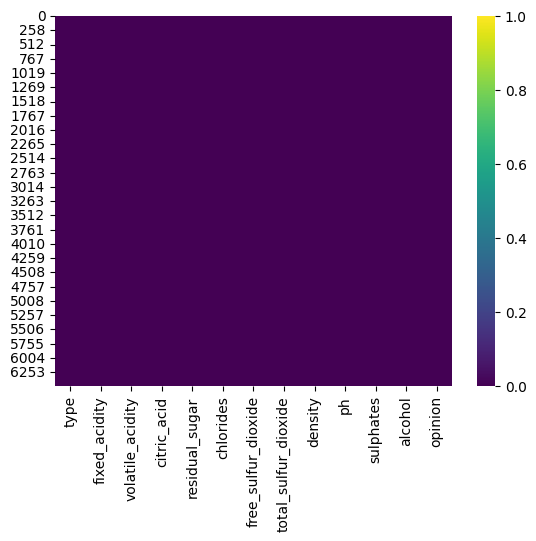

In [115]:
#Analise de dados nulos no HeatMap
sns.heatmap(data.isna(), vmin=0, vmax=1, cmap='viridis')

##Para as questões 2-5 usaremos apenas os vinhos do tipo "branco".

In [116]:
# Criar novo dataframe data_branco com o type = white e dropa a coluna Type
data_branco = data[data['type'] == 'white'].copy()
data_branco.drop('type', axis=1, inplace=True)
data_branco.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  opinion  
0      8.8        1  
1      9.5        1  
2     10.1        1  
3      9.9        1  
4      9.9        1


#3 - Descreva as variáveis presentes na base. Quais são as variáveis? Quais são os tipos de variáveis (discreta, categórica, contínua)?


#Variáveis Categóricas (variáveis qualitativas)

type (object): Indica o tipo de vinho
Variáveis Numéricas

opinion (int64): Representa uma avaliação da qualidade do vinho (1 e 0).

#Variáveis Contínuas

  fixed_acidity (float64): Quantidade de acidez fixa no vinho.

  volatile_acidity (float64): Quantidade de acidez volátil no vinho.

  citric_acid (float64): Nível de ácido cítrico.

  residual_sugar (float64): Quantidade de açúcar residual.

  chlorides (float64): Quantidade de cloretos (sal).

  free_sulfur_dioxide (float64): Quantidade de dióxido de enxofre livre.

  total_sulfur_dioxide (float64): Quantidade total de dióxido de enxofre.

  density (float64): Densidade do vinho.

  ph (float64): Medida de acidez ou alcalinidade.

  sulphates (float64): Quantidade de sulfatos.






In [117]:
#Analisar a tipagem do Dataset e se temos dados nulos
data_branco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4870 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4870 non-null   float64
 1   volatile_acidity      4870 non-null   float64
 2   citric_acid           4870 non-null   float64
 3   residual_sugar        4870 non-null   float64
 4   chlorides             4870 non-null   float64
 5   free_sulfur_dioxide   4870 non-null   float64
 6   total_sulfur_dioxide  4870 non-null   float64
 7   density               4870 non-null   float64
 8   ph                    4870 non-null   float64
 9   sulphates             4870 non-null   float64
 10  alcohol               4870 non-null   float64
 11  opinion               4870 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 494.6 KB


###Quais são as médias e desvios padrões?

Podemos analizar que o desvio padrão com uma diferça sginificativa da média pode nos indicar que nossos dados estão mais dispersos.

Exmplo do total_sulfur_dioxide  que a media = 138.3, desvio padrão = 42.4

In [118]:
# Calculando a média e o desvio padrão das variáveis
media_desvio_padrao = data_branco.describe().loc[['mean', 'std']]

# Exibendo para analize a media e descio padrão
media_desvio_padrao


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
mean       6.855123          0.278071     0.334199        6.394343   0.045771   
std        0.843444          0.100528     0.120915        5.070853   0.021846   

      free_sulfur_dioxide  total_sulfur_dioxide   density        ph  \
mean            35.317146            138.340144  0.994026  3.188154   
std             17.012967             42.490515  0.002993  0.150902   

      sulphates    alcohol   opinion  
mean   0.489700  10.516772  0.665298  
std    0.114196   1.231251  0.471935

In [119]:
#Verificar o balanciamento das classes
data_branco['opinion'].value_counts(normalize=True)

opinion
1    0.665298
0    0.334702
Name: proportion, dtype: float64

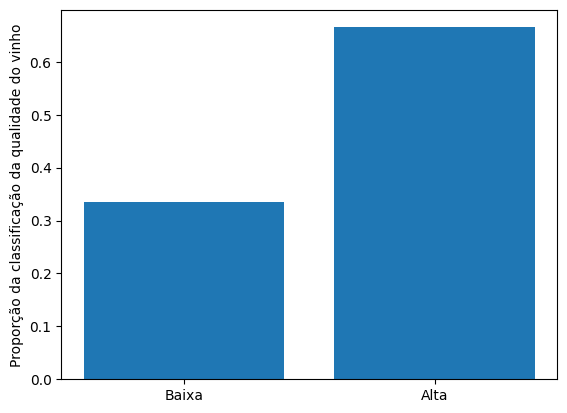

In [120]:
# Balanciamento de classe via Bar chart
proportions = data_branco['opinion'].value_counts(normalize=True)

plt.bar(x=proportions.index, height=proportions.values)
plt.xticks(ticks=[0, 1], labels=['Baixa','Alta'])
plt.ylabel('Proporção da classificação da qualidade do vinho')
plt.show()

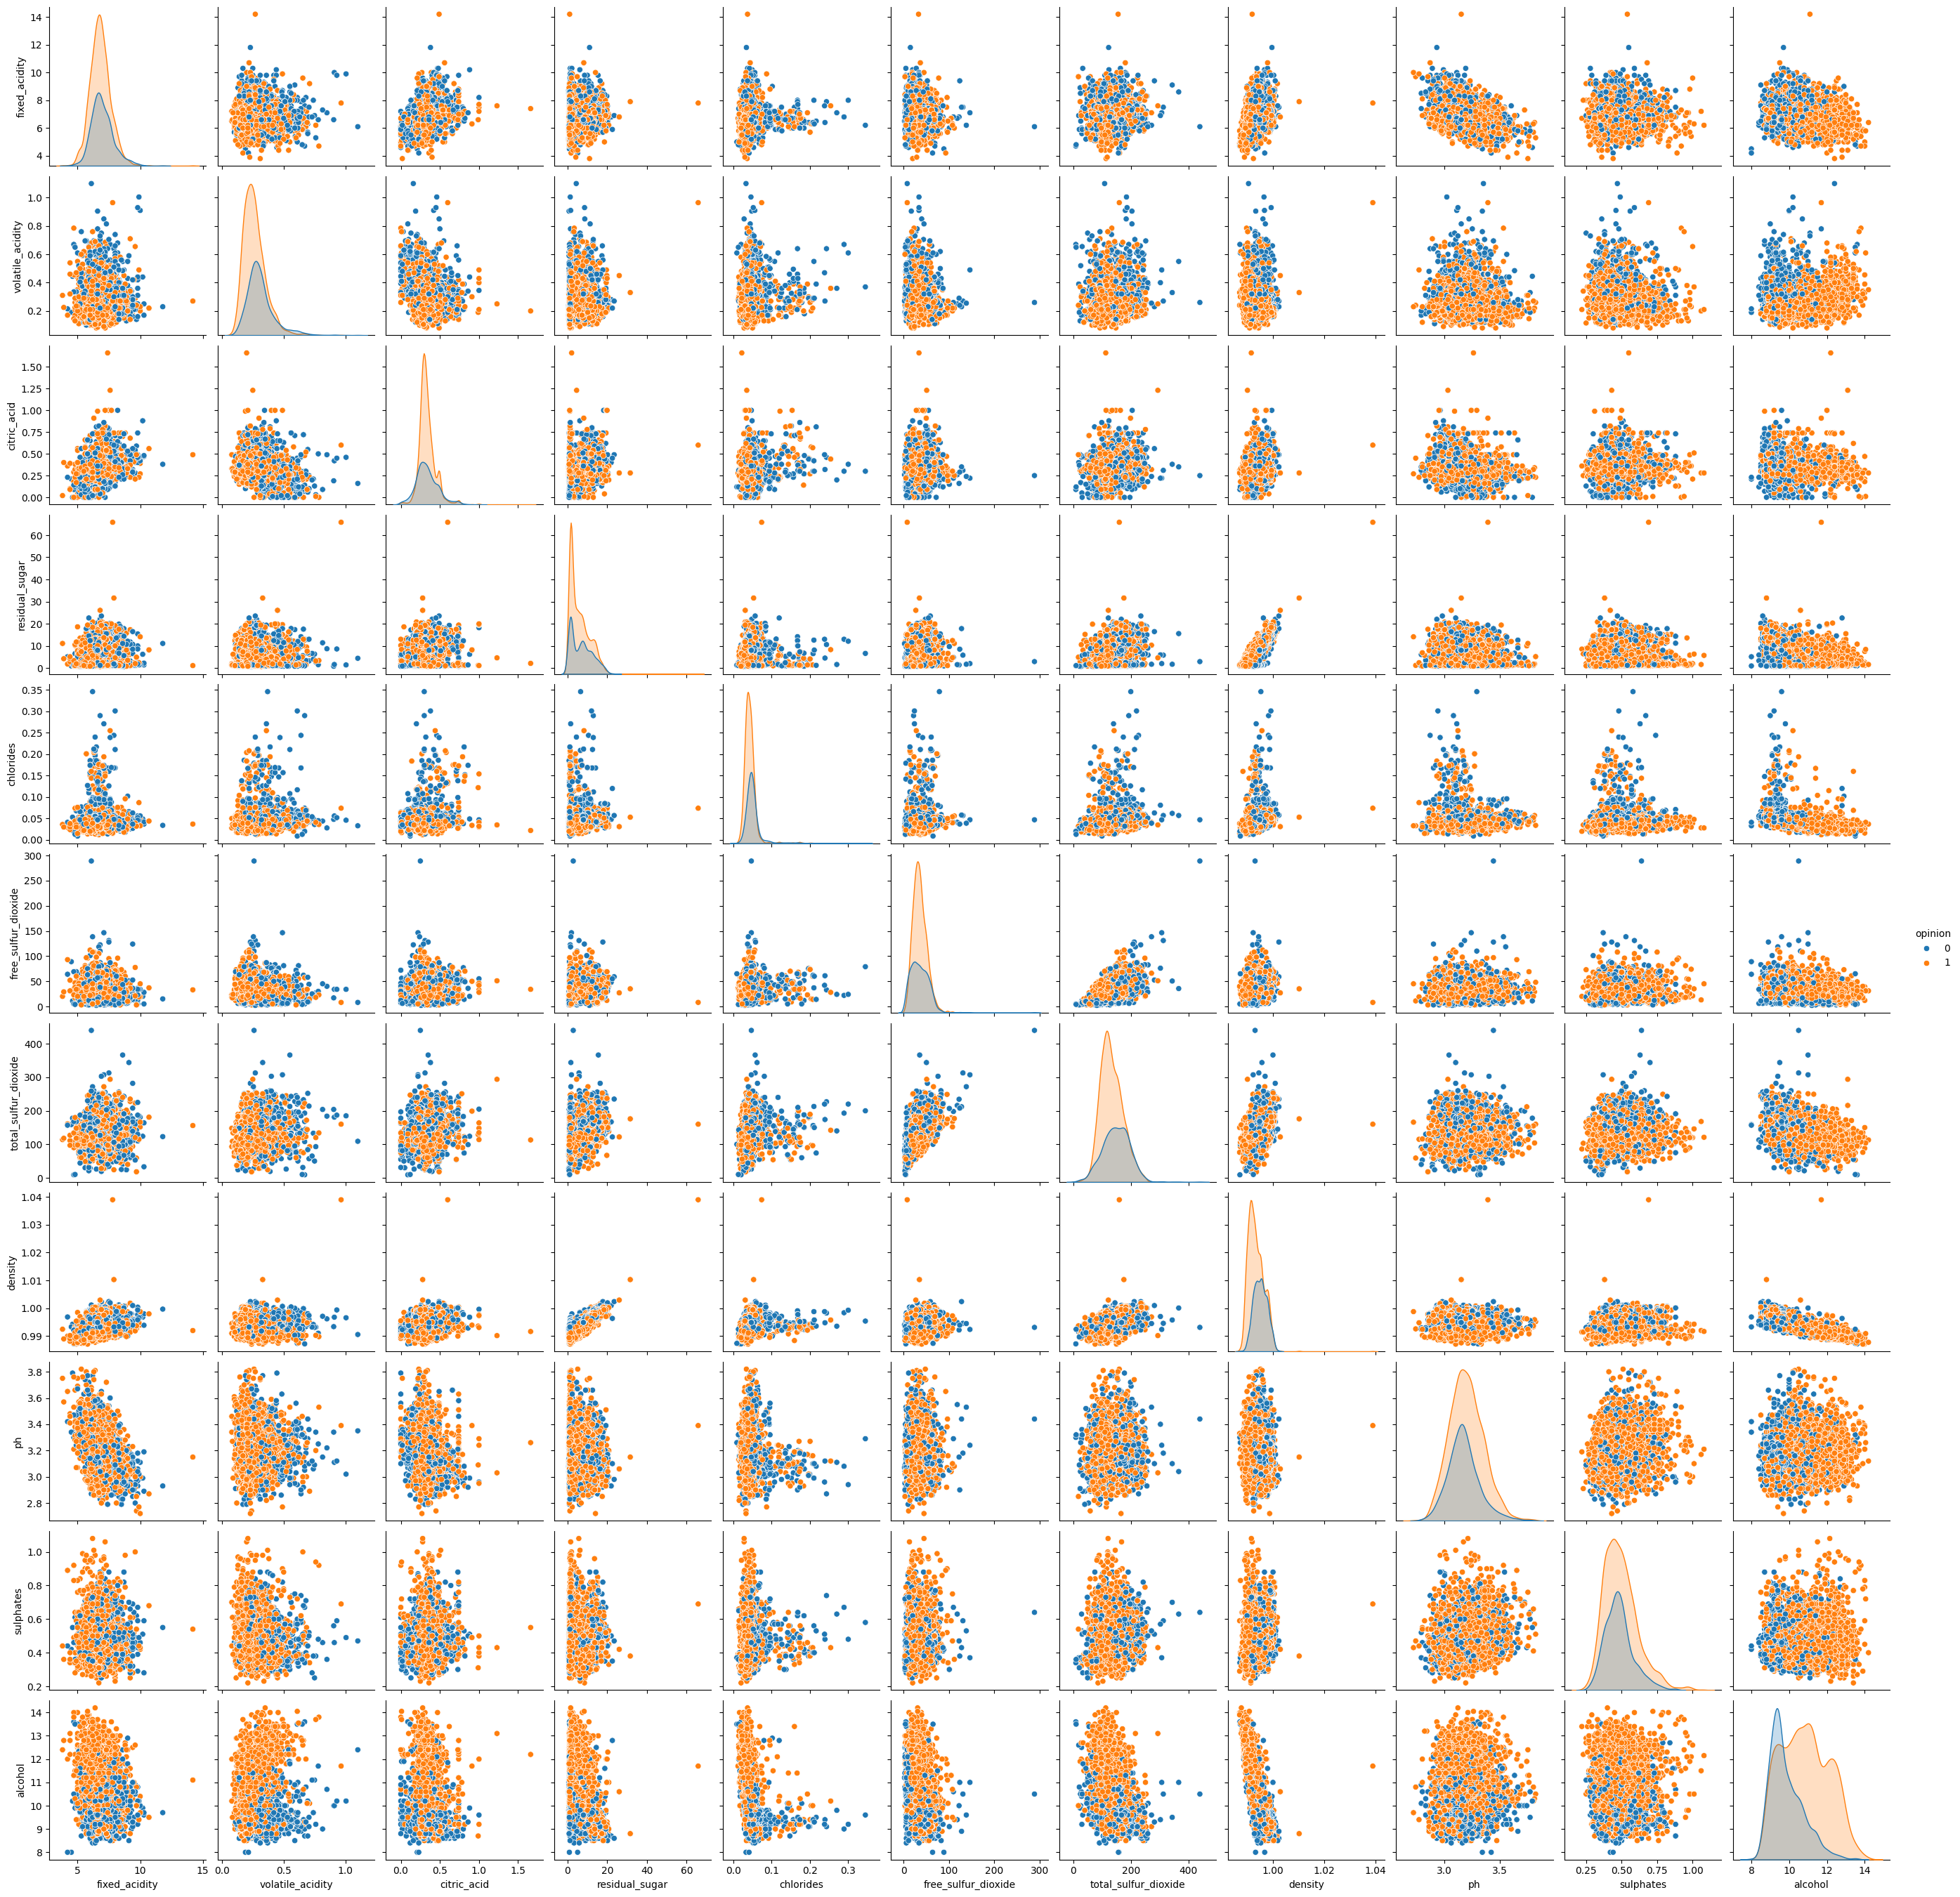

In [121]:
# Analise de separabilidade linear visualmente em duas dimenssoes
sns.pairplot(data_branco, hue='opinion')

In [122]:
# separando x e y
target = 'opinion'
X = data_branco.drop(columns=[target])
y = data_branco[[target]]

In [123]:
# separação treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [124]:
# analise de proporções após a separação de treino e teste
proporcao = pd.DataFrame(y.value_counts(normalize=True).values, columns=['original'])
proporcao['train'] = y_train.value_counts(normalize=True).values
proporcao['test'] = y_test.value_counts(normalize=True).values
proporcao

original     train      test
0  0.665298  0.665298  0.665298
1  0.334702  0.334702  0.334702

In [125]:
# Criando um modelo baseline - hipótese: Todos os vinhos são classificados com qualidade alta (opnion = 1)
y_base = np.repeat(1, repeats=y_test.shape[0])
y_base

array([1, 1, 1, ..., 1, 1, 1])

In [126]:
# Validando as métricas do modelo baseline
print(classification_report(y_test, y_base))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       489
           1       0.67      1.00      0.80       972

    accuracy                           0.67      1461
   macro avg       0.33      0.50      0.40      1461
weighted avg       0.44      0.67      0.53      1461



##4- Com a base escolhida:

a.Descreva as etapas necessárias para criar um modelo de classificação eficiente.
 #1 BLA
 #BLA2
 #Bla bla bla
 #Bla vla bla..

b.Treine um modelo de regressão logística usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:

i. a média e desvio da acurácia dos modelos obtidos;

ii. a média e desvio da precisão dos modelos obtidos;

iii. a média e desvio da recall dos modelos obtidos;

iv. a média e desvio do f1-score dos modelos obtidos.

In [127]:
# Separando todos os campos numericos
num = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'ph', 'sulphates', 'alcohol' ]
num

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'ph',
 'sulphates',
 'alcohol']

In [128]:
# criando um pipeline de processamento
preprocessor = ColumnTransformer([
    ('numeric', RobustScaler(),num)
])

# criando os pipelines
reglog_categ = Pipeline([
    ('transformer', preprocessor),
    ('selector', SelectKBest(f_classif)),
    ('model', LogisticRegression(solver='saga'))
])

dt_categ = Pipeline([
    ('transformer', preprocessor),
    ('selector', SelectKBest(f_classif)),
    ('model', DecisionTreeClassifier(random_state=2))
])
svc_categ = Pipeline([
    ('transformer', preprocessor),
    ('selector', SelectKBest(f_classif)),
    ('svc', SVC(probability=True, random_state=2))
])

# configurar o espaço de busca
params_grid_reglog = {
    'model__penalty': ['l1', 'l2', 'elasticnet', None],
    'model__C': [0.001, 0.01, 0.1, 1, 10],
    'model__l1_ratio': [0.25, 0.5, 0.75],
    'model__class_weight': ['balanced', None],
    'selector__k': range(1, 11)
}

params_grid_dt = {
    'model__max_depth': range(2, 11),
    'model__criterion': ['gini', 'entropy'],
    'model__class_weight': ['balanced', None],
    'selector__k': range(1, 11)
}

params_grid_svc = {
    'selector__k': range(1, 11)
}

# configurar o amostrador - estratificado
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

In [129]:
# configura um buscador aleatório - reglog
rs_reglog = RandomizedSearchCV(
    estimator=reglog_categ,
    param_distributions=params_grid_reglog,
    n_iter=50,
    scoring='f1',
    cv=splitter,
    refit=True,
    error_score=0,
    verbose=10
)

# configura um buscador aleatório - dt
rs_dt = RandomizedSearchCV(
    estimator=dt_categ,
    param_distributions=params_grid_dt,
    n_iter=50,
    scoring='f1',
    cv=splitter,
    refit=True,
    error_score=0,
    verbose=10
)
# configura um buscador aleatório - svm
rs_svc = RandomizedSearchCV(
    estimator=svc_categ,
    param_distributions=params_grid_svc,
    n_iter=50,
    scoring='f1',
    cv=splitter,
    refit=True,
    error_score=0,
    verbose=10
)


In [130]:
#Fit da regressão logistica
rs_reglog.fit(x_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10; 1/50] START model__C=10, model__class_weight=balanced, model__l1_ratio=0.25, model__penalty=None, selector__k=10
[CV 1/10; 1/50] END model__C=10, model__class_weight=balanced, model__l1_ratio=0.25, model__penalty=None, selector__k=10;, score=0.747 total time=   0.2s
[CV 2/10; 1/50] START model__C=10, model__class_weight=balanced, model__l1_ratio=0.25, model__penalty=None, selector__k=10
[CV 2/10; 1/50] END model__C=10, model__class_weight=balanced, model__l1_ratio=0.25, model__penalty=None, selector__k=10;, score=0.748 total time=   0.2s
[CV 3/10; 1/50] START model__C=10, model__class_weight=balanced, model__l1_ratio=0.25, model__penalty=None, selector__k=10
[CV 3/10; 1/50] END model__C=10, model__class_weight=balanced, model__l1_ratio=0.25, model__penalty=None, selector__k=10;, score=0.752 total time=   0.2s
[CV 4/10; 1/50] START model__C=10, model__class_weight=balanced, model__l1_ratio=0.25, model__penalty=None

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
                   error_score=0,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               RobustScaler(),
                                                                               ['fixed_acidity',
                                                                                'volatile_acidity',
                                                                                'citric_acid',
                                                                                'residual_sugar',
                                                                                'chlorides',
                                                                                'free_sulfur_dioxide',
                                                                                'total_sulfur_dioxide',
                                                                                'density',
                                                                                'ph',
                                                                                'sulphates',
                                                                                'alcohol'])])),
                                             ('selector', SelectKBest()),
                                             ('model',
                                              LogisticRegression(solver='saga'))]),
                   n_iter=50,
                   param_distributions={'model__C': [0.001, 0.01, 0.1, 1, 10],
                                        'model__class_weight': ['balanced',
                                                                None],
                                        'model__l1_ratio': [0.25, 0.5, 0.75],
                                        'model__penalty': ['l1', 'l2',
                                                           'elasticnet', None],
                                        'selector__k': range(1, 11)},
                   scoring='f1', verbose=10)

In [131]:
#Fit da Arvore de decisão
rs_dt.fit(x_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10; 1/50] START model__class_weight=None, model__criterion=gini, model__max_depth=5, selector__k=3
[CV 1/10; 1/50] END model__class_weight=None, model__criterion=gini, model__max_depth=5, selector__k=3;, score=0.804 total time=   0.0s
[CV 2/10; 1/50] START model__class_weight=None, model__criterion=gini, model__max_depth=5, selector__k=3
[CV 2/10; 1/50] END model__class_weight=None, model__criterion=gini, model__max_depth=5, selector__k=3;, score=0.795 total time=   0.0s
[CV 3/10; 1/50] START model__class_weight=None, model__criterion=gini, model__max_depth=5, selector__k=3
[CV 3/10; 1/50] END model__class_weight=None, model__criterion=gini, model__max_depth=5, selector__k=3;, score=0.847 total time=   0.0s
[CV 4/10; 1/50] START model__class_weight=None, model__criterion=gini, model__max_depth=5, selector__k=3
[CV 4/10; 1/50] END model__class_weight=None, model__criterion=gini, model__max_depth=5, selector__k=3;, scor

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
                   error_score=0,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               RobustScaler(),
                                                                               ['fixed_acidity',
                                                                                'volatile_acidity',
                                                                                'citric_acid',
                                                                                'residual_sugar',
                                                                                'chlorides',
                                                                                'free_sulfur_dioxide',
                                                                                'total_sulfur_dioxide',
                                                                                'density',
                                                                                'ph',
                                                                                'sulphates',
                                                                                'alcohol'])])),
                                             ('selector', SelectKBest()),
                                             ('model',
                                              DecisionTreeClassifier(random_state=2))]),
                   n_iter=50,
                   param_distributions={'model__class_weight': ['balanced',
                                                                None],
                                        'model__criterion': ['gini', 'entropy'],
                                        'model__max_depth': range(2, 11),
                                        'selector__k': range(1, 11)},
                   scoring='f1', verbose=10)

In [132]:
#Fit da SVC
rs_svc.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START selector__k=1.............................................
[CV 1/10; 1/10] END ..............selector__k=1;, score=0.773 total time=   2.4s
[CV 2/10; 1/10] START selector__k=1.............................................
[CV 2/10; 1/10] END ..............selector__k=1;, score=0.734 total time=   1.5s
[CV 3/10; 1/10] START selector__k=1.............................................
[CV 3/10; 1/10] END ..............selector__k=1;, score=0.757 total time=   1.6s
[CV 4/10; 1/10] START selector__k=1.............................................
[CV 4/10; 1/10] END ..............selector__k=1;, score=0.778 total time=   1.6s
[CV 5/10; 1/10] START selector__k=1.............................................
[CV 5/10; 1/10] END ..............selector__k=1;, score=0.776 total time=   1.6s
[CV 6/10; 1/10] START selector__k=1.............................................
[CV 6/10; 1/10] END ..............selector__k=

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
                   error_score=0,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               RobustScaler(),
                                                                               ['fixed_acidity',
                                                                                'volatile_acidity',
                                                                                'citric_acid',
                                                                                'residual_sugar',
                                                                                'chlorides',
                                                                                'free_sulfur_dioxide',
                                                                                'total_sulfur_dioxide',
                                                                                'density',
                                                                                'ph',
                                                                                'sulphates',
                                                                                'alcohol'])])),
                                             ('selector', SelectKBest()),
                                             ('svc',
                                              SVC(probability=True,
                                                  random_state=2))]),
                   n_iter=50, param_distributions={'selector__k': range(1, 11)},
                   scoring='f1', verbose=10)

In [133]:
print('Regressão Logística')
print(rs_reglog.best_params_)
print()
print('Arvore de decisão')
print(rs_dt.best_params_)
print()
print('SVC')
print(rs_svc.best_params_)
print()

Regressão Logística
{'selector__k': 8, 'model__penalty': 'l2', 'model__l1_ratio': 0.75, 'model__class_weight': None, 'model__C': 1}

Arvore de decisão
{'selector__k': 3, 'model__max_depth': 6, 'model__criterion': 'gini', 'model__class_weight': None}

SVC
{'selector__k': 10}



In [134]:
# analisando melhores métricas médias
print('Regressão Logística')
print(rs_reglog.best_score_)
print()
print('Arvore de decisão')
print(rs_dt.best_score_)
print()
print('SVC')
print(rs_svc.best_score_)
print()

Regressão Logística
0.8225376675494213

Arvore de decisão
0.8214069644201238

SVC
0.832020776988679



In [135]:
yhat_train_rg = rs_reglog.predict(x_train)
yhat_test_rg = rs_reglog.predict(x_test)
yhat_train_dt = rs_dt.predict(x_train)
yhat_test_dt = rs_dt.predict(x_test)
yhat_train_svc = rs_svc.predict(x_train)
yhat_test_svc = rs_svc.predict(x_test)


In [136]:
print('********************  Regressão Logística  ********************')
print('Base de Treinamento')
print(classification_report(y_train, yhat_train_rg))
print()
print('Base de Teste')
print(classification_report(y_test, yhat_test_rg))
print()
print('********************  Arvore de decisao   ********************')
print('Base de Treinamento')
print(classification_report(y_train, yhat_train_dt))
print()
print('Base de Teste')
print(classification_report(y_test, yhat_test_dt))
print()
print('********************          SVC         ********************')
print('Base de Treinamento')
print(classification_report(y_train, yhat_train_svc))
print()
print('Base de Teste')
print(classification_report(y_test, yhat_test_svc))
print()


********************  Regressão Logística  ********************
Base de Treinamento
              precision    recall  f1-score   support

           0       0.67      0.49      0.57      1141
           1       0.77      0.88      0.82      2268

    accuracy                           0.75      3409
   macro avg       0.72      0.69      0.70      3409
weighted avg       0.74      0.75      0.74      3409


Base de Teste
              precision    recall  f1-score   support

           0       0.73      0.50      0.59       489
           1       0.78      0.91      0.84       972

    accuracy                           0.77      1461
   macro avg       0.75      0.70      0.72      1461
weighted avg       0.76      0.77      0.76      1461


********************  Arvore de decisao   ********************
Base de Treinamento
              precision    recall  f1-score   support

           0       0.72      0.58      0.64      1141
           1       0.81      0.89      0.84      2268



##5- Em relação à questão anterior, qual o modelo deveria ser escolhido para uma eventual operação. Responda essa questão mostrando a comparação de todos os modelos, usando um gráfico mostrando a curva ROC média para cada um dos gráficos e justifique.

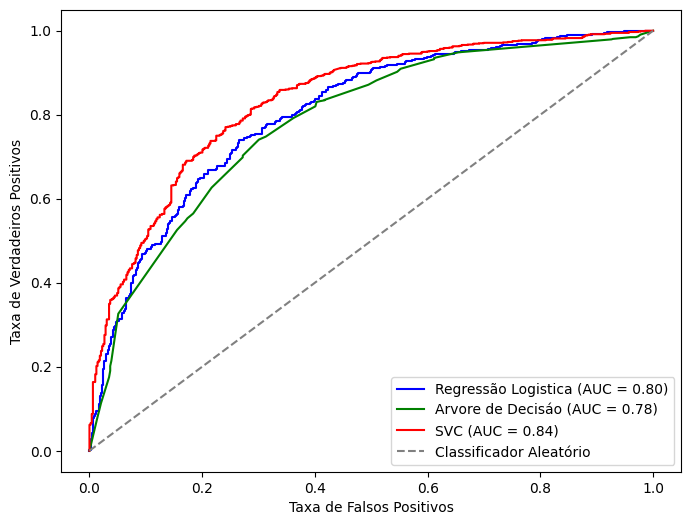

In [137]:
# realizar as previsões das probabilidades de toda base de teste para os tres modelos
prob_reglog_test = rs_reglog.predict_proba(x_test)
prob_dt_test     = rs_dt.predict_proba(x_test)
prob_svc_test    = rs_svc.predict_proba(x_test)

# realizar as previsões das probabilidades de toda base de teste para os tres modelos
fpr_reglog, tpr_reglog, _ = roc_curve(y_test, [c[1] for c in prob_reglog_test])
fpr_dt, tpr_dt, _         = roc_curve(y_test, [c[1] for c in prob_dt_test])
fpr_svc, tpr_svc, _       = roc_curve(y_test, [c[1] for c in prob_svc_test])

# métrica de avalição rápida da ROC - Area under the curve
roc_auc_reglog = roc_auc_score(y_test, [c[1] for c in prob_reglog_test])
roc_auc_dt     = roc_auc_score(y_test, [c[1] for c in prob_dt_test])
roc_auc_svc    = roc_auc_score(y_test, [c[1] for c in prob_svc_test])

plt.figure(figsize=(8, 6))
plt.plot(fpr_reglog, tpr_reglog, color='blue',label=f'Regressão Logistica (AUC = {roc_auc_reglog:.2f})')
plt.plot(fpr_dt, tpr_dt,color='green', label=f'Arvore de Decisáo (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_svc, tpr_svc, color='red', label=f'SVC (AUC = {roc_auc_svc:.2f})')
plt.plot([0, 1], [0, 1],  color='grey', linestyle='--', label='Classificador Aleatório')
plt.legend()
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.show()

In [138]:
# métrica de avalição rápida da ROC - Area under the curve
print(f'Área abaixo da curva - AUC ROC Regressão Logística : {roc_auc_reglog:.2f}')
print(f'Área abaixo da curva - AUC ROC Árvore de Decisão   : {roc_auc_dt:.2f}')
print(f'Área abaixo da curva - AUC ROC SVC                 : {roc_auc_svc:.2f}')

Área abaixo da curva - AUC ROC Regressão Logística : 0.80
Área abaixo da curva - AUC ROC Árvore de Decisão   : 0.78
Área abaixo da curva - AUC ROC SVC                 : 0.84



c.Treine um modelo de árvores de decisão usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:

i. a média e desvio da acurácia dos modelos obtidos;

ii. a média e desvio da precisão dos modelos obtidos;

iii. a média e desvio da recall dos modelos obtidos;

iv. a média e desvio do f1-score dos modelos obtidos.

d.Treine um modelo de SVM usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:

i. a média e desvio da acurácia dos modelos obtidos;

ii. a média e desvio da precisão dos modelos obtidos;

iii. a média e desvio da recall dos modelos obtidos;

iv. a média e desvio do f1-score dos modelos obtidos.









##6- Com a escolha do melhor modelo, use os dados de vinho tinto, presentes na base original e faça a inferência (não é para treinar novamente!!!) para saber quantos vinhos são bons ou ruins. Utilize o mesmo critério utilizado com os vinhos brancos, para comparar o desempenho do modelo. Ele funciona da mesma forma para essa nova base? Justifique.

In [139]:
# Criar novo dataframe data_vermelho com o type = white e dropa a coluna Type
data_vermelho = data[data['type'] == 'red'].copy()
data_vermelho.drop('type', axis=1, inplace=True)
data_vermelho.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
4898            7.4              0.70         0.00             1.9      0.076   
4899            7.8              0.88         0.00             2.6      0.098   
4900            7.8              0.76         0.04             2.3      0.092   
4901           11.2              0.28         0.56             1.9      0.075   
4902            7.4              0.70         0.00             1.9      0.076   

      free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
4898                 11.0                  34.0   0.9978  3.51       0.56   
4899                 25.0                  67.0   0.9968  3.20       0.68   
4900                 15.0                  54.0   0.9970  3.26       0.65   
4901                 17.0                  60.0   0.9980  3.16       0.58   
4902                 11.0                  34.0   0.9978  3.51       0.56   

      alcohol  opinion  
4898      9.4        0  
4899      9.8        0  
4900      9.8        0  
4901      9.8        1  
4902      9.4        0

In [140]:
#Verificar o balanciamento das classes
data_vermelho['opinion'].value_counts(normalize=True)

opinion
1    0.534212
0    0.465788
Name: proportion, dtype: float64

In [141]:
# separando x e y
target = 'opinion'
X = data_vermelho.drop(columns=[target])
y = data_vermelho[[target]]

In [142]:
# separação treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [143]:
#Fazebdo a precisão
yhat_train_svc = rs_svc.predict(x_train)
yhat_test_svc = rs_svc.predict(x_test)

In [144]:
print('Base de Treinamento')
print(classification_report(y_train, yhat_train_svc))
print()
print('Base de Teste')
print(classification_report(y_test, yhat_test_svc))
print()

Base de Treinamento
              precision    recall  f1-score   support

           0       0.51      0.87      0.64       519
           1       0.71      0.26      0.38       596

    accuracy                           0.55      1115
   macro avg       0.61      0.57      0.51      1115
weighted avg       0.61      0.55      0.50      1115


Base de Teste
              precision    recall  f1-score   support

           0       0.49      0.89      0.64       223
           1       0.68      0.21      0.32       255

    accuracy                           0.53       478
   macro avg       0.59      0.55      0.48       478
weighted avg       0.59      0.53      0.47       478




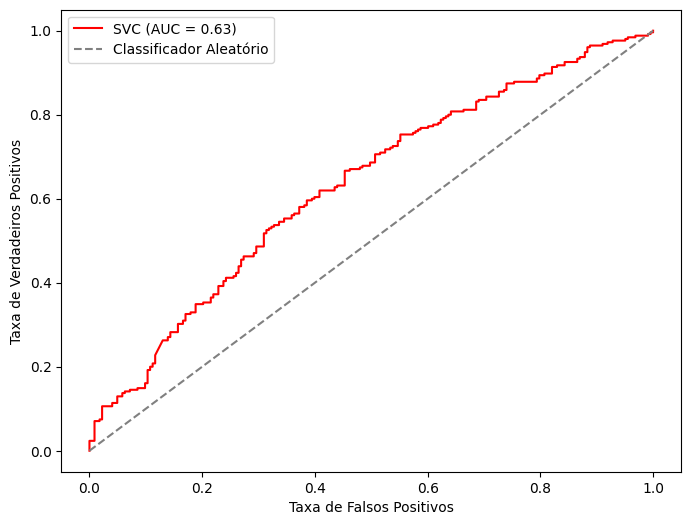

In [145]:
# realizar as previsões das probabilidades de toda base de teste para os tres modelos
prob_svc_test = rs_svc.predict_proba(x_test)

# realizar as previsões das probabilidades de toda base de teste para os tres modelos
fpr_svc, tpr_svc, _  = roc_curve(y_test, [c[1] for c in prob_svc_test])

# métrica de avalição rápida da ROC - Area under the curve
roc_auc_svc    = roc_auc_score(y_test, [c[1] for c in prob_svc_test])

plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, color='red', label=f'SVC (AUC = {roc_auc_svc:.2f})')
plt.plot([0, 1], [0, 1],  color='grey', linestyle='--', label='Classificador Aleatório')
plt.legend()
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.show()

In [147]:
# métrica de avalição rápida da ROC - Area under the curve
print(f'Área abaixo da curva - AUC ROC SVC: {roc_auc_svc:.2f}')

Área abaixo da curva - AUC ROC SVC: 0.63



##6-Disponibilize os códigos usados para responder da questão 2-6 em uma conta github e indique o link para o repositório.


Assim que terminar, salve o seu arquivo PDF e poste no Moodle. Utilize o seu nome para nomear o arquivo, identificando também a disciplina no seguinte formato: “nomedoaluno_nomedadisciplina_pd.PDF”.